<a href="https://colab.research.google.com/github/vfeistauer/Spotify/blob/main/EDA_I_SPOTIFY_1921_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Dados SPOTIFY Músicas de 1921 - 2020

Iremos realizar uma exploração sobre os dados vistos anteriormente do spotify, para visuaalização de gráficos iremos utilizar o **SEABORN** e o **MATPLOTLIB**

Abaixo Documentações:

- [Matplotlib](https://matplotlib.org/stable/tutorials/index.html#introductory)
- [Seaborn](https://seaborn.pydata.org/tutorial.html)


## Descrição Dados

Lembrando sempre de entender o máximo possivel sobre nossos dados temos abaixo a documentação sobre os mesmos.

**ACOUSTICNESS** 
Uma medida de confiança de 0,0 a 1,0 para saber se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica.

**DANCEABILITY**

Descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é mais dançante.

**ENERGY**

É uma medida de 0,0 a 1,0 e representa uma medida perceptual de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach tem pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.


**INSTRUMENTALNESS**

Prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou palavra falada são claramente “vocais”. Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior será a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

**LIVENESS**


Detecta a presença de um público na gravação. Valores de vivacidade mais altos representam um aumento na probabilidade de a trilha ter sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ao vivo.


**LOUDNESS**


O volume geral de uma faixa em decibéis (dB). Os valores de intensidade são calculados em toda a faixa e são úteis para comparar a intensidade relativa das trilhas. Os valores típicos variam entre -60 e 0 db.

**SPEECHINESS**


A fala detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada for a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são compostas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, em seções ou em camadas, incluindo casos como rap.

**VALENCE**

Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórico), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, com raiva).

**TEMPO**


O tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, o tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média do tempo.

**KEY**

A chave geral estimada da pista. Os inteiros mapeiam para arremessos usando a notação de classe de pitch padrão. Por exemplo. 0 = C, 1 = C♯ / D ♭, 2 = D e assim por diante. Se nenhuma chave for detectada, o valor é -1.

**MODE**


Modo indica a modalidade  (major or minor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. O major é representado por 1 e o minor é 0.

**EXPLICITY**

 0 = Não contém conteúdo explicito.
 1 = Contém conteúdo explicito.


Link : [SPOTIFY KEAGGLE](https://www.kaggle.com/ektanegi/spotifydata-19212020?select=data.csv)

## Possiveis Perguntas 28/04

As músicas lançadas em 2020, possuem menor presença de publico (liveness <0.5) ?

O sentimento das musicas em 2020 mudou ?

A correlação de energia(energy) e dançabilidade(danceability) são altas ?

Popularidade em relação ao lançamento ano música ?

Qual a duração média das músicas mais populares (>95) ?

Musicas explicitas tem uma popularidade menor ?

Alguma key é mais popular que outras ?

## Posiveis Perguntas

- Conseguimos prever a popularidade de uma música pelas caracteristicas ?
- Quais músicas possuem maior popularidade ?
- Como as variáveis se relacionam com a populariade ?
- Há mudança de comportamento/importancia ao longo do tempo ?
- Músicas explicitas podem ser mais populares ?
- Dançabilidade e Energia são parecidos ?
- O sentimento (valencia baixa), e energia, tem o o mode 0 ?
- Musicas explicitas tem muita audiencia?


In [ ]:
!pip install -U seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
## ref - https://pythonguides.com/what-is-matplotlib-inline/
%matplotlib inline

In [ ]:
#statistics lib
from scipy import stats

In [ ]:
# Carrega Dataset
df = pd.read_csv("spotify_music_cleaned.csv")
print(df.shape)
df.columns

(169909, 19)


Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [ ]:
## Inspenção Rápida
df.sort_values(by='popularity', ascending=False, inplace=True)
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.730,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020
87940,0.24700,"['DaBaby', 'Roddy Ricch']",0.746,181733,0.690,1,7ytR5pFWmSjzHJIeQkgog4,0.000000,11,0.1010,-7.956,1,ROCKSTAR (feat. Roddy Ricch),99,2020-04-17,0.1640,89.977,0.497,2020
87949,0.73100,"['Powfu', 'beabadoobee']",0.726,173333,0.431,0,7eJMfftS33KTjuF7lTsMCx,0.000000,8,0.6960,-8.765,0,death bed (coffee for your head) (feat. beabad...,97,2020-02-08,0.1350,144.026,0.348,2020
87941,0.23300,"['THE SCOTTS', 'Travis Scott', 'Kid Cudi']",0.716,165978,0.537,1,39Yp9wwQiSRIDOvrVg7mbk,0.000000,0,0.1570,-7.648,0,THE SCOTTS,96,2020-04-24,0.0514,129.979,0.280,2020
87852,0.06860,"['Surf Mesa', 'Emilee']",0.674,176547,0.774,0,62aP9fBQKYKxi7PDXwcUAS,0.001880,11,0.3930,-7.567,0,ily (i love you baby) (feat. Emilee),95,2019-11-26,0.0892,112.050,0.330,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169909 entries, 87942 to 0
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             169

In [ ]:
df['duration_minute'] = df.duration_ms/1000/60

In [ ]:
df.hist?

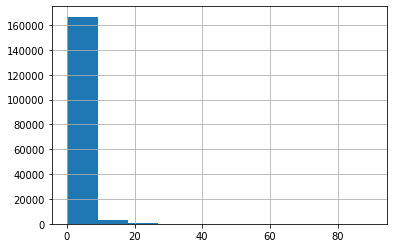

In [ ]:
df.duration_minute.hist()

In [ ]:
df[df.duration_minute>10]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duration_minute
32050,0.002110,['TOOL'],0.417,713192,0.529,0,03sEzk1VyrUZSgyhoQR0LZ,0.755,9,0.1100,-9.338,0,Pneuma,67,2019-08-30,0.0315,114.116,0.0561,2019,11.886533
83476,0.771000,['Pink Floyd'],0.266,811077,0.294,0,6pnwfWyaWjQiHCKTiZLItr,0.697,7,0.1070,-11.938,0,Shine On You Crazy Diamond (Pts. 1-5),66,1975-09-12,0.0291,137.941,0.0397,1975,13.517950
86930,0.020200,"['Sounds Of Nature : Thunderstorm, Rain']",0.217,1787761,0.911,0,2AI8gjczczIGkUxospO0MF,0.724,1,0.3370,-27.515,1,"Music For Sleep Thunderstorm, Rain",66,2009-05-28,0.1800,91.211,0.0265,2009,29.796017
47970,0.000824,['TOOL'],0.313,620101,0.584,0,39zWYYZStDgWi32sOU9AX4,0.520,7,0.0529,-10.091,1,Fear Inoculum,65,2019-08-30,0.0415,87.894,0.1590,2019,10.335017
24055,0.085000,['Lil Darkie'],0.457,632625,0.965,1,68Y3zzmt2XxzheQVGbbJt4,0.000,1,0.6970,0.457,1,GENOCIDE,64,2019-05-20,0.4860,170.122,0.6040,2019,10.543750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145171,0.990000,"['Robert Schumann', 'Claudio Arrau', 'Karl Kru...",0.230,895920,0.186,0,63kcqKEXHY5QFALveeB8B3,0.904,0,0.1730,-15.238,1,"Piano Concerto in A Minor, Op. 54: I. Allegro ...",0,1941,0.0364,80.820,0.0970,1941,14.932000
145176,0.911000,"[""Vincent d'Indy"", 'Pierre Monteux']",0.129,712040,0.346,0,66CUjWOqNEK00TSUGabqEj,0.919,2,0.0782,-13.715,1,"Symphony No. 2 in B-Flat Major, Op. 57: I. Ext...",0,1941,0.0376,82.205,0.0722,1941,11.867333
145208,0.960000,"[""Vincent d'Indy"", 'Pierre Monteux', 'Maxim Sc...",0.106,671733,0.184,0,6NgY9z6ur5Xdniql1bQ0k7,0.826,6,0.1040,-18.056,1,"Symphonie sur un chant montagnard français, Op...",0,1941,0.0395,76.389,0.0390,1941,11.195550
145178,0.975000,"['Ludwig van Beethoven', 'Eugene Ormandy', 'Ph...",0.293,950840,0.155,0,6705OmLjCu99G3aWF4b9jI,0.740,0,0.0881,-15.729,0,"Piano Concerto No. 3 in C Minor, Op. 37: I. Al...",0,1941,0.0391,68.225,0.1350,1941,15.847333


In [ ]:
## Deletar colunas que não serão utilizadas
df.drop(columns=['id'], inplace=True)

KeyError: ignored

In [ ]:
## Validação Campos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169909 entries, 87942 to 0
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   instrumentalness  169909 non-null  float64
 7   key               169909 non-null  int64  
 8   liveness          169909 non-null  float64
 9   loudness          169909 non-null  float64
 10  mode              169909 non-null  int64  
 11  name              169909 non-null  object 
 12  popularity        169909 non-null  int64  
 13  release_date      169909 non-null  object 
 14  speechiness       169909 non-null  float64
 15  tempo             169909 non-null  float64
 16  valence           169

In [ ]:
## Conversão Data e Criação de campo ano
df['release_date'] = pd.to_datetime(df['release_date'] )
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169909 entries, 87942 to 0
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   acousticness      169909 non-null  float64       
 1   artists           169909 non-null  object        
 2   danceability      169909 non-null  float64       
 3   duration_ms       169909 non-null  int64         
 4   energy            169909 non-null  float64       
 5   explicit          169909 non-null  int64         
 6   instrumentalness  169909 non-null  float64       
 7   key               169909 non-null  int64         
 8   liveness          169909 non-null  float64       
 9   loudness          169909 non-null  float64       
 10  mode              169909 non-null  int64         
 11  name              169909 non-null  object        
 12  popularity        169909 non-null  int64         
 13  release_date      169909 non-null  datetime64[ns]
 14  speec

In [ ]:
## Validação Missing Values
df.isna().sum()/df.shape[0]

acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
release_date        0.0
speechiness         0.0
tempo               0.0
valence             0.0
year                0.0
duration_minute     0.0
month               0.0
dtype: float64

In [ ]:
len(df.artists.unique())

33375

In [ ]:
df.dropna(inplace=True)

## Avaliação de Distribuições e Densidade

In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,duration_minute,month
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231,3.856769,4.067030
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168,2.022032,3.888574
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,0.085133,1.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000,2.850667,1.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000,3.476667,1.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000,4.382667,7.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000,90.058333,12.000000


In [ ]:
df.popularity.describe()

count    169909.000000
mean         31.556610
std          21.582614
min           0.000000
25%          12.000000
50%          33.000000
75%          48.000000
max         100.000000
Name: popularity, dtype: float64

In [ ]:
plt.hist?

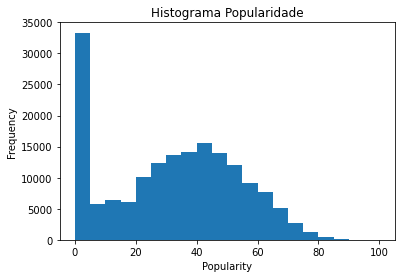

In [ ]:
## Podemos ver a distribuição de 2 formas, com o matplot ou seaborn:
# df.popularity.hist(bins=10, density=True, title="Histo Popularidade")

## Usando matplot
plt.hist(df.popularity, bins=20)
plt.title('Histograma Popularidade')
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

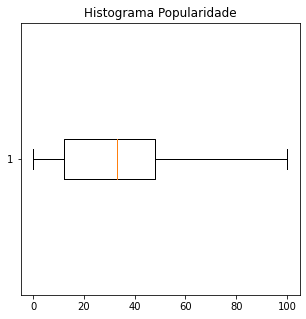

In [ ]:
## Podemos ver a distribuição de 3 formas:
plt.figure(figsize =(5,5))
# df.boxplot('popularity', vert=False)
plt.boxplot(df.popularity, vert=False)
plt.title('Histograma Popularidade')
plt.show()

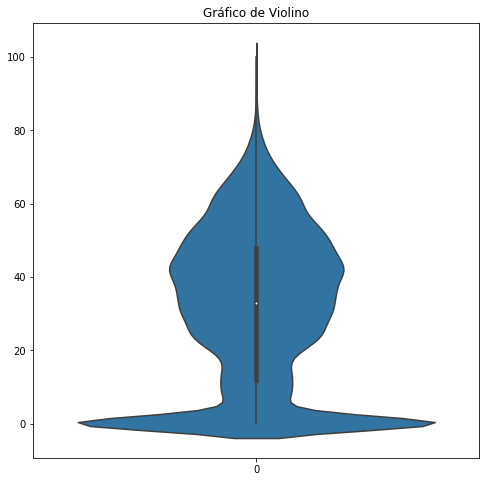

In [ ]:
plt.figure(figsize =(8,8))
sns.violinplot(df.popularity)
plt.title('Gráfico de Violino')
plt.show()

In [ ]:
sns.histplot?

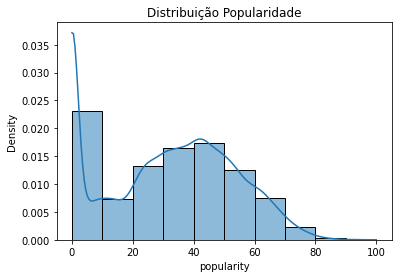

In [ ]:
# histplot, displot, distplot

sns.histplot(data=df, x="popularity", bins=10,  stat="density", kde=True)
plt.title('Distribuição Popularidade')
plt.show()

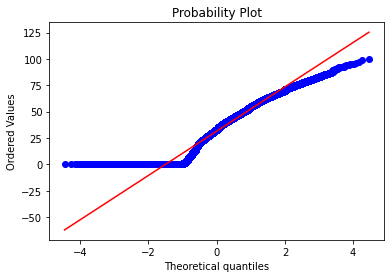

In [ ]:
## Este é uma curva normal ?

## Teste QQPLOT
## Ref - https://data.library.virginia.edu/understanding-q-q-plots/
## Função scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
res = stats.probplot(df['popularity'], plot=plt)
plt.show()

In [ ]:
continous_var = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

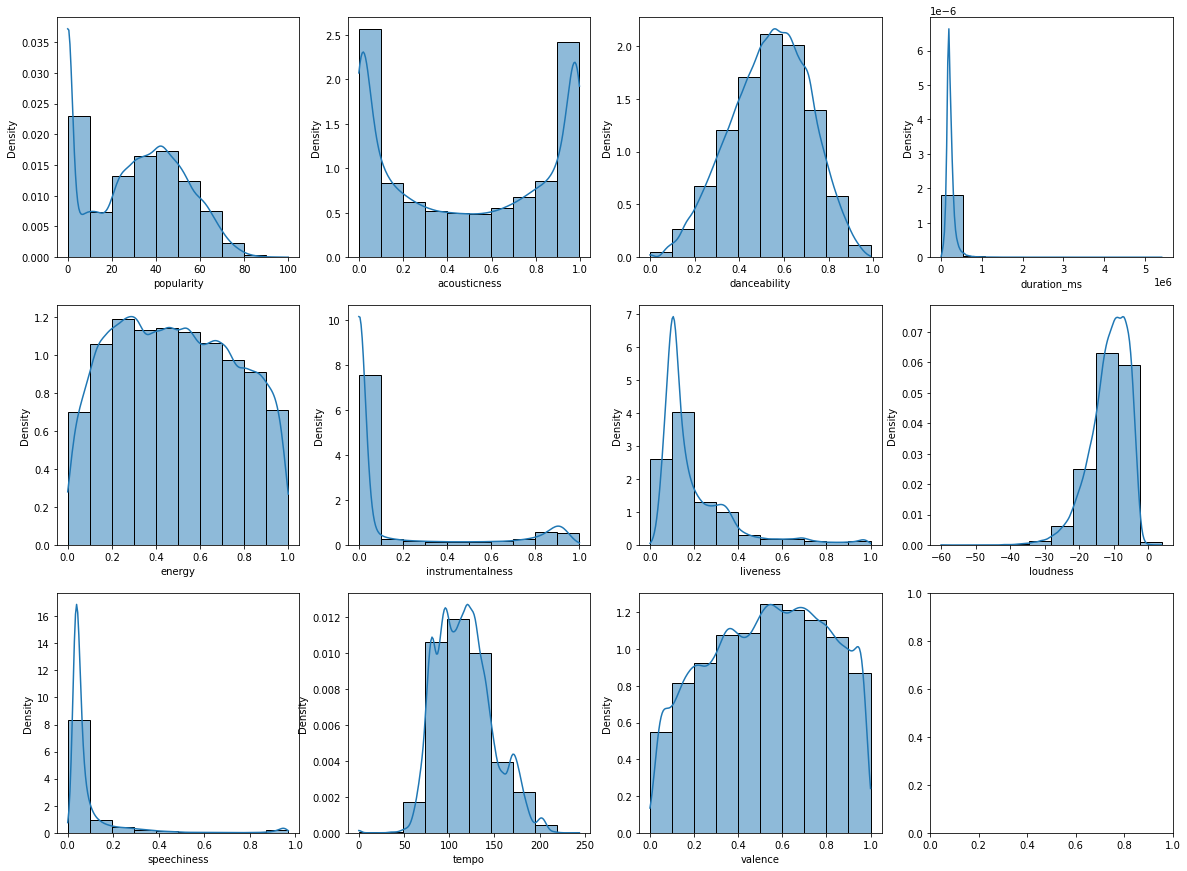

In [ ]:
# Olhando para todas as variaveis
n_rows=3
n_cols=4
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20, 15)

for i, column in enumerate(continous_var):
  sns.histplot(df[column], ax=axes[i//n_cols,i%n_cols], bins=10,  stat="density", kde=True)
  # sns.histplot(df[column], bins=10,  stat="density", kde=True)
  
plt.show()

## Associação

In [ ]:
 df.corr?

In [ ]:
corr_var = df[continous_var].corr()

In [ ]:
corr_var

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.593345,0.221077,0.063292,0.497488,-0.299829,-0.075293,0.466546,-0.135707,0.135047,0.009327
acousticness,-0.593345,1.000000,-0.265950,-0.079311,-0.750283,0.335821,-0.023871,-0.567072,-0.056077,-0.204982,-0.185540
danceability,0.221077,-0.265950,1.000000,-0.134500,0.220569,-0.281429,-0.105532,0.294170,0.225305,-0.004872,0.560242
duration_ms,0.063292,-0.079311,-0.134500,1.000000,0.036396,0.084814,0.034270,-0.014687,-0.058449,-0.028816,-0.198760
energy,0.497488,-0.750283,0.220569,0.036396,1.000000,-0.287692,0.126293,0.782982,-0.045226,0.249936,0.350086
instrumentalness,-0.299829,0.335821,-0.281429,0.084814,-0.287692,1.000000,-0.047397,-0.417033,-0.115735,-0.107570,-0.193929
liveness,-0.075293,-0.023871,-0.105532,0.034270,0.126293,-0.047397,1.000000,0.052985,0.147667,0.008124,-0.000426
loudness,0.466546,-0.567072,0.294170,-0.014687,0.782982,-0.417033,0.052985,1.000000,-0.105796,0.211114,0.308418
speechiness,-0.135707,-0.056077,0.225305,-0.058449,-0.045226,-0.115735,0.147667,-0.105796,1.000000,-0.010070,0.056383
tempo,0.135047,-0.204982,-0.004872,-0.028816,0.249936,-0.107570,0.008124,0.211114,-0.010070,1.000000,0.171182


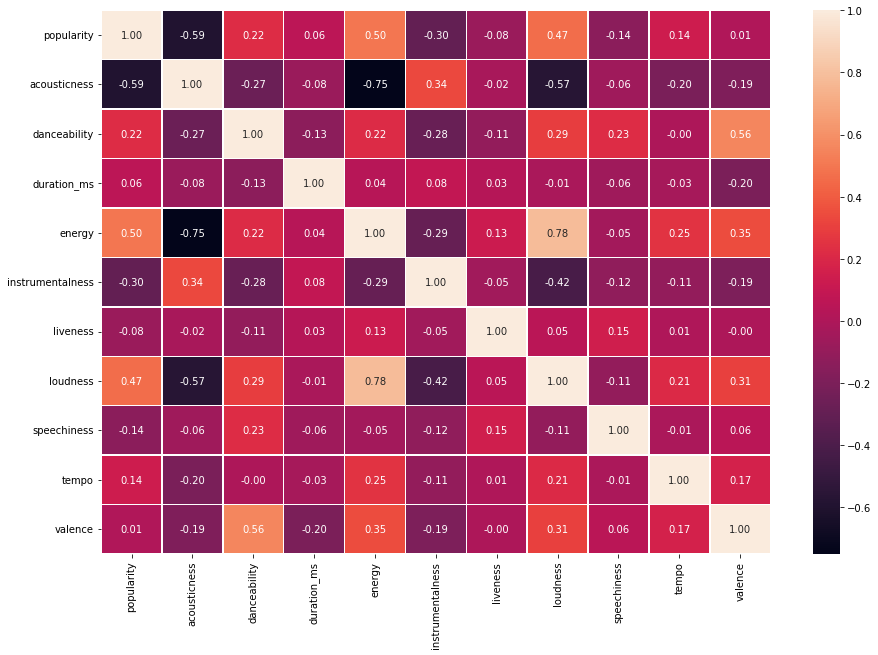

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data = corr_var, linewidths=.5, annot=True,  fmt=".2f")
plt.show()

Respondendo uma das perguntas feitas no inicio, há uma correlação positiva entre valência e dançabilidade. Parece haver uma forte correlação negativa entre energia e acústica.
Vamos também verificar os 10 principais artistas em termos de energia média por música e comparar os resultados com seus valores médios de acústica e popularidade.

In [ ]:
df[['artists','energy','acousticness','popularity']].groupby('artists').mean().sort_values(by='energy', ascending=False)[:10]

,energy,acousticness,popularity
artists,,,
['Ocean Sounds ACE'],1.000000,0.629000,58.0
['Darkthrone'],0.999500,0.008002,41.0
['Nature Sounds Nature Music'],0.999333,0.640000,54.0
['Tranquility Spree'],0.999000,0.112000,68.0
['Thunderbound Productions'],0.999000,0.954000,63.0
['Lluvia PQ'],0.999000,0.123000,65.0
['Swell Maps'],0.999000,0.000298,21.0
['The Relaxing Sounds of Swedish Nature'],0.999000,0.508000,65.0
['Caramella Girls'],0.998500,0.028700,58.5


In [ ]:
df[['artists','energy','acousticness','popularity']].groupby('artists').agg({"energy":"mean", "acousticness":"median", "popularity":"max"}).head(10)
# .mean().sort_values(by='energy', ascending=False)[:10]

,energy,acousticness,popularity
artists,,,
"[""'In The Heights' Original Broadway Company"", 'Mandy Gonzalez']",0.242000,0.84800,54
"[""'In The Heights' Original Broadway Company""]",0.628000,0.55300,48
"[""'Legally Blonde' Ensemble"", 'Michael Rupert', 'Nikki Snelson']",0.533000,0.40400,48
"[""'Legally Blonde' Ensemble"", 'Michael Rupert']",0.293000,0.64700,44
"[""'Til Tuesday""]",0.612250,0.07975,55
"[""Adolescent's Orquesta""]",0.685778,0.45400,66
"[""Alexander 'Skip' Spence""]",0.395714,0.72100,35
"[""Alexander O'Neal""]",0.615200,0.09360,53
"[""Alexis Korner's Blues Incorporated""]",0.207000,0.83500,43


In [ ]:
df.acousticness.mean()

0.49321397614988033

## Avaliação no Tempo

In [ ]:
year_avg = df[['danceability','energy','liveness','acousticness', 'valence','year']].groupby('year').mean().sort_values(by='year').reset_index()
year_avg.head()

,year,danceability,energy,liveness,acousticness,valence
0,1921,0.425661,0.236784,0.215814,0.895823,0.425495
1,1922,0.480000,0.237026,0.238647,0.939236,0.534056
2,1923,0.568462,0.246936,0.236656,0.976329,0.624788
3,1924,0.548654,0.347033,0.237875,0.935575,0.668574
4,1925,0.571890,0.264373,0.243094,0.965422,0.616430


In [ ]:
sns.lineplot?

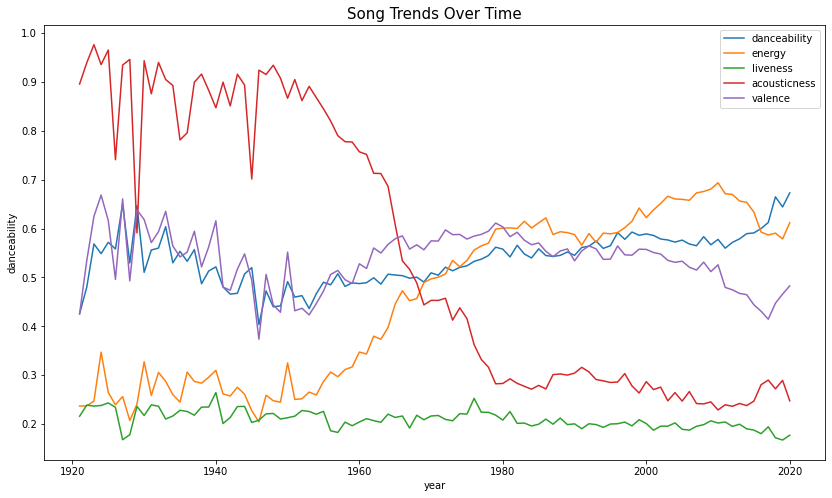

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Song Trends Over Time", fontsize=15)
lines = ['danceability','energy','liveness','acousticness','valence']
for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
plt.legend(lines)
plt.show()

Aqui vemos que algumas variaveis crescem ao longo do tempo, essas são **energia, valence, dançabilidade**.
E observamos a **acustica** como maior queda ao longo dos anos.

## Avaliação Grupo

In [ ]:
df.explicit.value_counts()

0    155490
1     14419
Name: explicit, dtype: int64

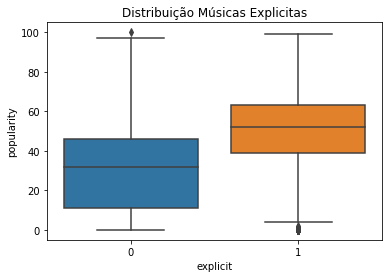

In [ ]:
## Músicas Explicitas
sns.boxplot(x=df.explicit, y=df.popularity)
plt.title('Distribuição Músicas Explicitas')
plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### Aplicalçao T-Test para médias

Doc - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

#### H0: Não há diferença entre as médias
#### H1: Há diferença

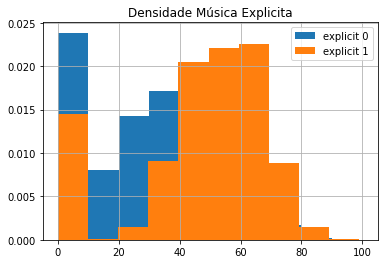

In [ ]:
df[df.explicit==0]['popularity'].hist(density=True)
df[df.explicit==1]['popularity'].hist(density=True)
plt.legend(['explicit 0', 'explicit 1'])
plt.title('Densidade Música Explicita')
plt.show()

In [ ]:
stats.ttest_ind(df[df.explicit==0]['popularity'], df[df.explicit==1]['popularity'])

Ttest_indResult(statistic=-90.32177595771358, pvalue=0.0)

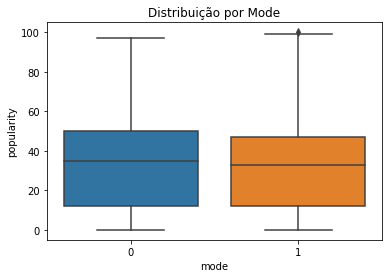

In [ ]:
# Músicas Major x Minor
sns.boxplot(x=df['mode'], y=df.popularity)
plt.title('Distribuição por Mode')
plt.show()

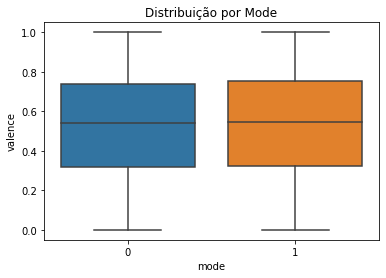

In [ ]:
## Músicas Major Minor vs Sentimento (Valence)
sns.boxplot(x=df['mode'], y=df.valence)
plt.title('Distribuição por Mode')
plt.show()

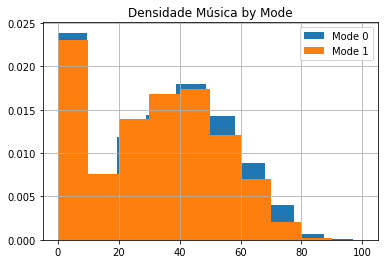

In [ ]:
df[df['mode']==0]['popularity'].hist(density=True)
df[df['mode']==1]['popularity'].hist(density=True)
plt.legend(['Mode 0', 'Mode 1'])
plt.title('Densidade Música by Mode')
plt.show()

In [ ]:
stats.ttest_ind(df[df['explicit']==0]['popularity'], df[df['mode']==1]['popularity'])

Ttest_indResult(statistic=-11.760481179882332, pvalue=6.348401021405311e-32)

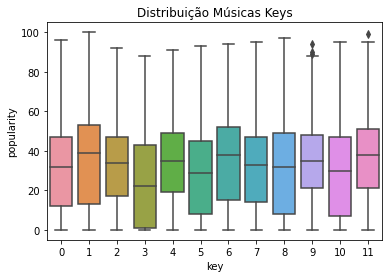

In [ ]:
sns.boxplot(x=df.key, y=df.popularity)
plt.title('Distribuição Músicas Keys')
plt.show()

In [ ]:
## ANOVA Para um grupo de variaveis 
## Doc - https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/anova/supporting-topics/basics/what-is-anova/
lm = ols('popularity ~ key', data=df).fit()
table = sm.stats.anova_lm(lm)
print(table)

                df        sum_sq      mean_sq          F    PR(>F)
key            1.0  9.018931e+03  9018.930705  19.363948  0.000011
Residual  169907.0  7.913569e+07   465.758879        NaN       NaN


## Grupos de Popularidade

In [ ]:
pd.cut?

In [ ]:
## Sera que as diferentes faixas apresentam diferentes comportamentos ?
## Grupos de Popularidade
df['popularity_group'] = pd.cut(df['popularity'], 4)
df.popularity_group.unique()

[(75.0, 100.0], (50.0, 75.0], (25.0, 50.0], (-0.1, 25.0]]
Categories (4, interval[float64, right]): [(-0.1, 25.0] < (25.0, 50.0] < (50.0, 75.0] <
                                           (75.0, 100.0]]

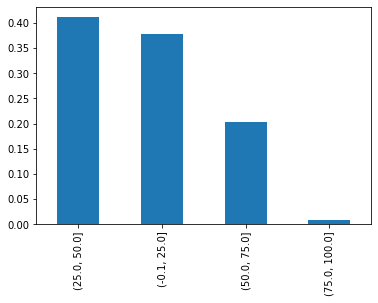

In [ ]:
df.popularity_group.value_counts(normalize=True).plot.bar()

In [ ]:
continous_var.remove('popularity')

In [ ]:
# continous_var.remove('duration_ms')
# continous_var.append('')

In [ ]:
df[df.popularity>=75].duration_minute.describe()

count    1798.000000
mean        3.541808
std         0.815905
min         1.006667
25%         3.031675
50%         3.457667
75%         3.907171
max         8.934450
Name: duration_minute, dtype: float64

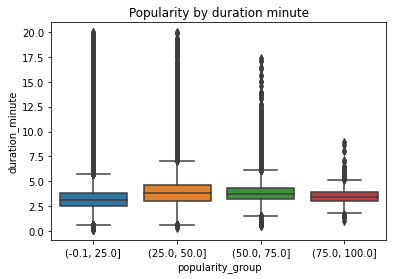

In [ ]:
sns.boxplot(x=df[df.duration_minute<20].popularity_group, y=df[df.duration_minute<20]["duration_minute"])
plt.title("Popularity by duration minute")
plt.show()

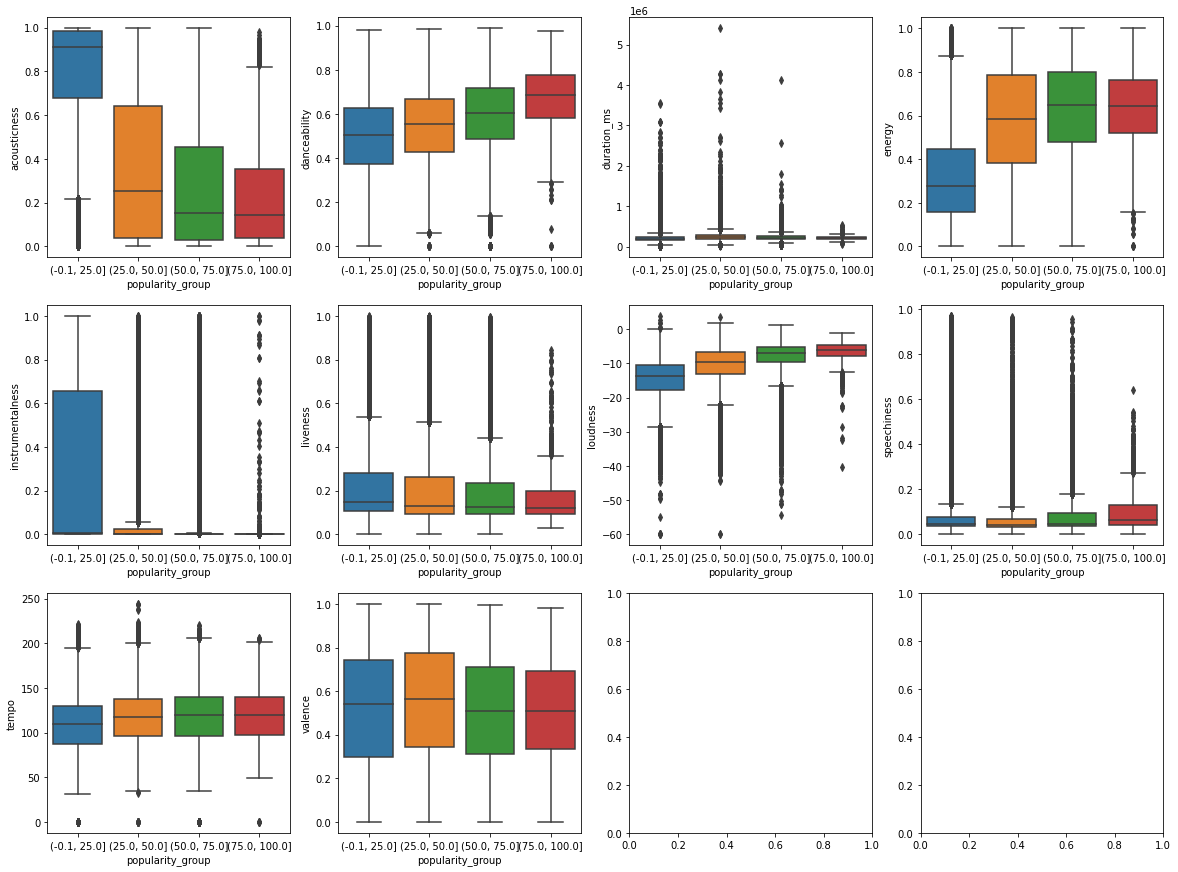

In [ ]:
# Olhando para todas as variaveis
n_rows=3
n_cols=4
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(20, 15)
for i, column in enumerate(continous_var):
  sns.boxplot(x=df.popularity_group, y=df[column], ax=axes[i//n_cols, i%n_cols])
plt.show()

In [ ]:
df_group = df.groupby(['year','popularity_group']).mean().reset_index()

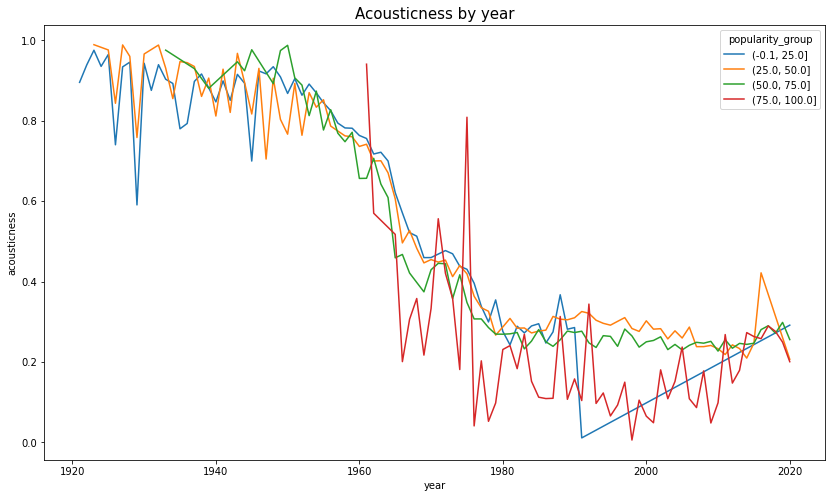

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Acousticness by year", fontsize=15)
sns.lineplot(data=df_group, x="year", y="acousticness", hue="popularity_group")
plt.show()

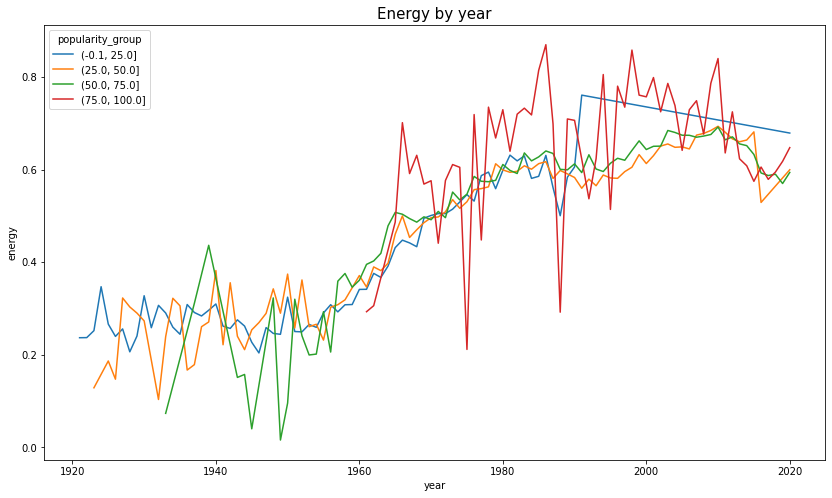

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Energy by year", fontsize=15)
sns.lineplot(data=df_group, x="year", y="energy", hue="popularity_group")
plt.show()

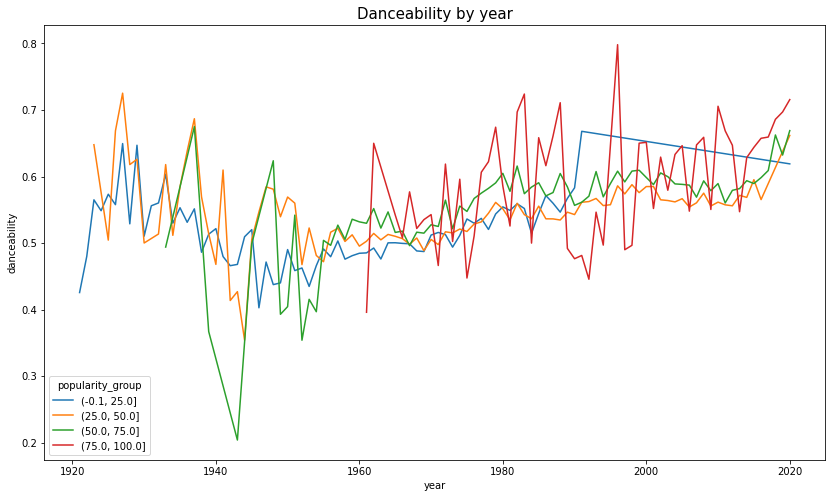

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Danceability by year", fontsize=15)
sns.lineplot(data=df_group, x="year", y="danceability", hue="popularity_group")
plt.show()

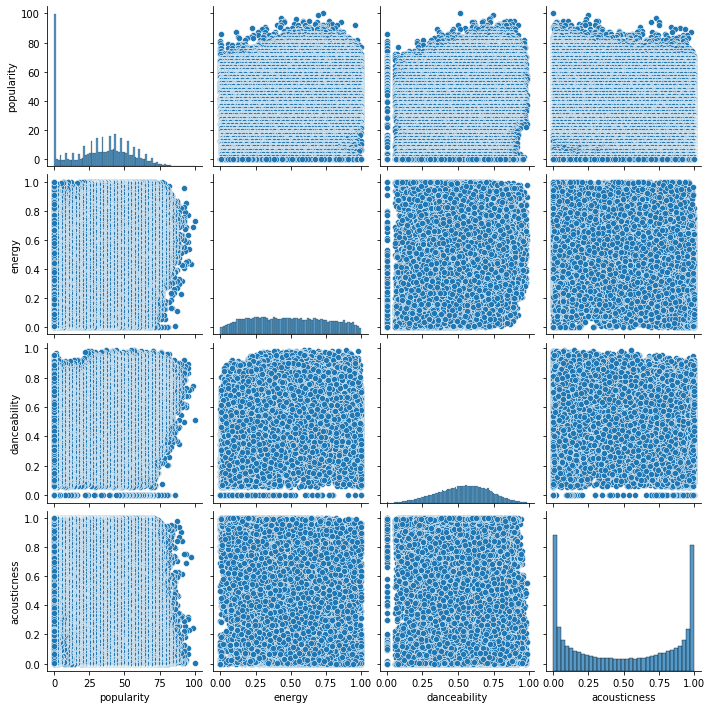

In [ ]:
## Analise Pair Plot 
sns.pairplot(df[['popularity','energy','danceability','acousticness']])
plt.show()

## Conclusões 


Músicas dançantes possuem melhor desempenho

Para uma modelagem futura poderiamos utilizar os dados:

Categoricos: Explicit, Key, Podendo uma das transformações ser a média uma vez que foi validada a diferença. 
Continuos: Energia, dançabilidade, acustica, loudness.

Como os dados se apresentam em diferentes escala pode ser interessante aplicar alguma normalização.

Podemos também utilizar a variavel de tempo e tratar o problema como uma séries temporal, pois é possivel ver alguns comportamentos de tendencia.



## Outras Possiveis Abordagens

Analise pré 90s x pós 90s.

Analises por genero.
